# Domain classifier (dSprites): data collection

**Author**: Maleakhi A. Wijaya  
**Description**: This notebook contains code used to run experiments related to the domain classifier. Particularly, we compare the performance of standard black-box domain classifier against the proposed inherently transparent concept-based models.

In [5]:
# Load utilities functions
%run ../../scripts/constants.py
%run ../../scripts/dsprites_utils.py
%run ../../scripts/shift_applicator.py
%run ../../scripts/shift_dimensionality_reductor.py
%run ../../scripts/c2st.py
%run ../../scripts/c2st_utils.py
%run ../../scripts/shift_statistical_test.py

In [6]:
## Random seed
SEED = 20
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Load dataset

In [4]:
path = "../../data/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
X_train, X_test, y_train, y_test, c_train, c_test = load_dsprites(path, 100000, DatasetTask.Task1, train_size=0.85, class_index=1)
n_classes = 2
concept_names = ["color", "shape", "scale", "rotation", "x", "y"]
concept_values = get_latent_sizes()
dataset = Dataset.DSPRITES

Training samples: 85000
Testing samples: 15000


In [5]:
adv_samples = np.load("../../data/adversarial_samples/X_adversarial_dsprites.npy")

In [6]:
# Reshape to appropriate shift input
# It is noteworthy that for efficiency, we represent the images as only 2 dimension
# when we preprocessing (number of instances/ batch size * flatten size).
# When visualising back the image, we need to reshape it back to the original dimension
ORIGINAL_SHAPE = X_test.shape[1:] # constant hold the image original shape
X_test_flatten = deepcopy(X_test.reshape(X_test.shape[0], -1))
X_train_flatten = deepcopy(X_train.reshape(X_train.shape[0], -1))

## Data collection

This section train various machine learning models, amounting to linear discriminant analysis, feedforward neural network, concept bottleneck models (CBMs), and the concept model extraction (CME). We capture the accuracy performance of these models in distinguishing source and target.

### LDA

In [10]:
c2st_param = ClassifierTwoSampleTest.LDA
method_str = "LDA"

**Gaussian shift**

In [11]:
shift_type = ShiftType.Gaussian
shift_str = "gaussian"

In [12]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5)

100%|██████████| 5/5 [45:25<00:00, 545.00s/it]


In [13]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Knockout shift**

In [14]:
shift_type = ShiftType.Knockout
shift_str = "ko"
shift_type_params = {"cl": MAJORITY}

In [15]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5, shift_type_params=shift_type_params)

100%|██████████| 5/5 [43:45<00:00, 525.05s/it]


In [16]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Image shift**

In [17]:
shift_type = ShiftType.All
shift_str = "all"
shift_type_params = {"orig_dims": ORIGINAL_SHAPE}

In [18]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5, shift_type_params=shift_type_params)

100%|██████████| 5/5 [47:28<00:00, 569.72s/it]


In [19]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Adversarial shift**

In [20]:
shift_type = ShiftType.Adversarial
shift_type_params = {
    "adv_samples": adv_samples
}
shift_str = "adversarial"

In [21]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5, shift_type_params=shift_type_params)

100%|██████████| 5/5 [44:28<00:00, 533.71s/it]


In [22]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


### FFNN

In [23]:
c2st_param = ClassifierTwoSampleTest.FFNN
method_str = "FFNN"

**Gaussian shift**

In [24]:
shift_type = ShiftType.Gaussian
shift_str = "gaussian"

In [25]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5)

100%|██████████| 5/5 [21:37<00:00, 259.56s/it]


In [26]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Knockout shift**

In [27]:
shift_type = ShiftType.Knockout
shift_str = "ko"
shift_type_params = {"cl": MAJORITY}

In [28]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5, shift_type_params=shift_type_params)

100%|██████████| 5/5 [13:41<00:00, 164.34s/it]


In [29]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Image shift**

In [30]:
shift_type = ShiftType.All
shift_str = "all"
shift_type_params = {"orig_dims": ORIGINAL_SHAPE}

In [31]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=5, shift_type_params=shift_type_params)

100%|██████████| 5/5 [28:16<00:00, 339.33s/it]


In [32]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Adversarial shift**

In [33]:
shift_type = ShiftType.Adversarial
shift_type_params = {
    "adv_samples": adv_samples
}
shift_str = "adversarial"

In [34]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=1, shift_type_params=shift_type_params)

100%|██████████| 1/1 [04:50<00:00, 290.85s/it]


In [35]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


### CBM - Independent

In [28]:
c2st_param = ClassifierTwoSampleTest.CBM
method_str = "CBM_INDEPENDENT"
untrained_cto = LogisticRegression()
training_mode = ConceptBottleneckTraining.Independent

**Gaussian shift**

In [25]:
shift_type = ShiftType.Gaussian
shift_str = "gaussian"

In [23]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto, training_mode, n_exp=3)

100%|██████████| 1/1 [33:59<00:00, 2039.34s/it]


In [26]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Knockout shift**

In [29]:
shift_type = ShiftType.Knockout
shift_str = "ko"
shift_type_params = {"cl": MAJORITY}

In [30]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto, training_mode, n_exp=3,
                                           shift_type_params=shift_type_params)


100%|██████████| 1/1 [19:02<00:00, 1142.20s/it]


In [31]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Image shift**

In [32]:
shift_type = ShiftType.All
shift_str = "all"
shift_type_params = {"orig_dims": ORIGINAL_SHAPE}

In [33]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto, 
                                           n_exp=3, shift_type_params=shift_type_params)


100%|██████████| 1/1 [31:35<00:00, 1895.16s/it]


In [34]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Adversarial shift**

In [35]:
shift_type = ShiftType.Adversarial
shift_type_params = {
    "adv_samples": adv_samples
}
shift_str = "adversarial"

In [36]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto,
                                           n_exp=3, shift_type_params=shift_type_params)


100%|██████████| 1/1 [39:13<00:00, 2353.22s/it]


In [37]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


### CBM - Sequential

In [8]:
c2st_param = ClassifierTwoSampleTest.CBM
method_str = "CBM_SEQUENTIAL"
training_mode = ConceptBottleneckTraining.Sequential
untrained_cto = LogisticRegression()

**Gaussian shift**

In [35]:
shift_type = ShiftType.Gaussian
shift_str="gaussian"

In [29]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto, training_mode, n_exp=3)

100%|██████████| 1/1 [36:43<00:00, 2203.50s/it]


In [30]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Knockout shift**

In [9]:
shift_type = ShiftType.Knockout
shift_str = "ko"
shift_type_params = {"cl": MAJORITY}

In [11]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto, training_mode, n_exp=3,
                                           shift_type_params=shift_type_params)


100%|██████████| 1/1 [16:53<00:00, 1013.78s/it]


In [12]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Image shift**

In [13]:
shift_type = ShiftType.All
shift_str = "all"
shift_type_params = {"orig_dims": ORIGINAL_SHAPE}

In [14]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto, 
                                           n_exp=3, shift_type_params=shift_type_params)


100%|██████████| 1/1 [32:47<00:00, 1967.98s/it]


In [15]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Adversarial shift**

In [16]:
shift_type = ShiftType.Adversarial
shift_type_params = {
    "adv_samples": adv_samples
}
shift_str = "adversarial"

In [17]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, untrained_cto,
                                           n_exp=3, shift_type_params=shift_type_params)


100%|██████████| 1/1 [36:22<00:00, 2182.63s/it]


In [18]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


### CBM - Joint

In [19]:
c2st_param = ClassifierTwoSampleTest.CBM
method_str = "CBM_JOINT"
training_mode = ConceptBottleneckTraining.Joint

**Gaussian shift**

In [31]:
shift_type = ShiftType.Gaussian
shift_str="gaussian"

In [32]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, training_mode=training_mode, n_exp=3)

100%|██████████| 1/1 [34:14<00:00, 2054.04s/it]


In [33]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Knockout shift**

In [20]:
shift_type = ShiftType.Knockout
shift_str = "ko"
shift_type_params = {"cl": MAJORITY}

In [21]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, n_exp=3, training_mode=training_mode, shift_type_params=shift_type_params)


100%|██████████| 1/1 [17:21<00:00, 1041.51s/it]


In [22]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Image shift**

In [23]:
shift_type = ShiftType.All
shift_str = "all"
shift_type_params = {"orig_dims": ORIGINAL_SHAPE}

In [24]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, training_mode=training_mode, 
                                           n_exp=3, shift_type_params=shift_type_params)


100%|██████████| 1/1 [29:23<00:00, 1763.82s/it]


In [25]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


**Adversarial shift**

In [26]:
shift_type = ShiftType.Adversarial
shift_type_params = {
    "adv_samples": adv_samples
}
shift_str = "adversarial"

In [27]:
dict_result = domain_classifier_experiment(c2st_param, dataset, X_train_flatten, 
                                           y_train, c_train, X_test_flatten, y_test, 
                                           c_test, shift_type, ORIGINAL_SHAPE, training_mode=training_mode,
                                           n_exp=3, shift_type_params=shift_type_params)


100%|██████████| 1/1 [33:59<00:00, 2039.61s/it]


In [28]:
save_result_dc(shift_str, method_str, dict_result)

Saving successfully.


## Save models

This section trained various models and store it in the results dictionary. The models will later be loaded for determining most shifted samples (in domain_classifier_results.ipynb).

We consider the following settings (large intensities for obvious results):
- Gaussian shifts 
- image shifts 
- knockout shifts 
- concept shifts (standard)
- adversarial shifts 

In [17]:
X_train_flatten = X_train_flatten
X_test_flatten = X_test_flatten

**Gaussian shift**

In [18]:
# Apply shifts
X_test_gaussian = deepcopy(X_test_flatten)
X_test_gaussian, y_test = apply_gaussian_shift(X_test_gaussian, y_test, ShiftIntensity.Large, 1.0)

# Generate domain classifier data
X_train_new, y_train_new, c_train_new, X_val_new, y_val_new, c_val_new, X_test_new, y_test_new, c_test_new = generate_domain_classifier_data(X_train_flatten, y_train, c_train,
                                                                                                                                             X_test_gaussian, y_test, c_test)
X_train_new = X_train_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_val_new = X_val_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_test_new = X_test_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])

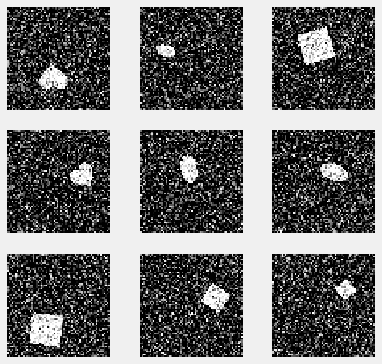

In [19]:
# Verify the resulting images
show_images_grid(X_test_gaussian.reshape([-1, 64, 64]), num_images=9)

In [20]:
# Train models (FFNN and CBM joint)
# FFNN
path = "../../models/gaussian_ffnn"
_, ffnn_model = end_to_end_binary_classifier(dataset, X_train_new, y_train_new, X_val_new,
                                             y_val_new, save_path=path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the FFNN domain classifier is {acc}.")

# CBM
path = "../../models/gaussian_cbm"
cbm_model = cbm_binary_classifier(dataset, ConceptBottleneckTraining.Joint, X_train_new,
                                  c_train_new, y_train_new, X_val_new, c_val_new, y_val_new,
                                  None, path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.CBM, cbm_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the CBM (joint) domain classifier is {acc}.")

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/gaussian_ffnn/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/gaussian_ffnn/assets


The accuracy of the FFNN domain classifier is 1.0.


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/gaussian_cbm/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/gaussian_cbm/assets


The accuracy of the CBM (sequential) domain classifier is 1.0.


**Image shift**

In [21]:
# Apply shifts
X_test_image = deepcopy(X_test_flatten)
X_test_image, y_test = apply_img_shift(X_test_image, y_test, ORIGINAL_SHAPE,
                                           ShiftIntensity.Large, 1.0, ShiftType.All)

# Generate domain classifier data
X_train_new, y_train_new, c_train_new, X_val_new, y_val_new, c_val_new, X_test_new, y_test_new, c_test_new = generate_domain_classifier_data(X_train_flatten, y_train, c_train,
                                                                                                                                             X_test_image, y_test, c_test)
X_train_new = X_train_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_val_new = X_val_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_test_new = X_test_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])

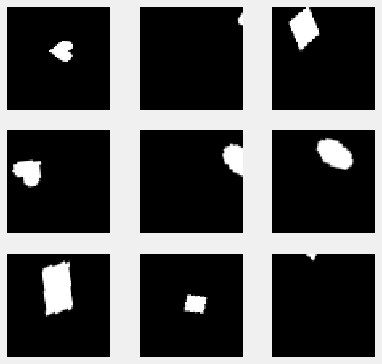

In [22]:
# Verify the resulting images
show_images_grid(X_test_image.reshape([-1, 64, 64]), num_images=9)

In [23]:
# Train models (FFNN and CBM Joint)
# FFNN
path = "../../models/image_ffnn"
_, ffnn_model = end_to_end_binary_classifier(dataset, X_train_new, y_train_new, X_val_new,
                                             y_val_new, save_path=path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the FFNN domain classifier is {acc}.")

# CBM
path = "../../models/image_cbm"
cbm_model = cbm_binary_classifier(dataset, ConceptBottleneckTraining.Joint, X_train_new,
                                  c_train_new, y_train_new, X_val_new, c_val_new, y_val_new,
                                  None, path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.CBM, cbm_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the CBM (joint) domain classifier is {acc}.")

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/image_ffnn/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/image_ffnn/assets


The accuracy of the FFNN domain classifier is 0.9788888888888889.


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/image_cbm/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/image_cbm/assets


The accuracy of the CBM (joint) domain classifier is 0.9967407407407407.


**Knockout shift**

In [24]:
X_ko, y_ko, c_ko = deepcopy(X_test_flatten), deepcopy(y_test), deepcopy(c_test)
X_ko, y_ko, c_ko = apply_ko_shift(X_ko, y_ko, c_ko, ShiftIntensity.Large, cl=MAJORITY)

# Generate domain classifier data
X_train_new, y_train_new, c_train_new, X_val_new, y_val_new, c_val_new, X_test_new, y_test_new, c_test_new = generate_domain_classifier_data(X_train_flatten, y_train, c_train,
                                                                                                                                             X_ko, y_ko, c_test)
X_train_new = X_train_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_val_new = X_val_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_test_new = X_test_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])

In [25]:
# Verify results
pd.DataFrame(y_ko).value_counts()

1    5017
2    4892
dtype: int64

In [26]:
# Train models (FFNN and CBM Sequential)
# FFNN
path = "../../models/ko_ffnn"
_, ffnn_model = end_to_end_binary_classifier(dataset, X_train_new, y_train_new, X_val_new,
                                             y_val_new, save_path=path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the FFNN domain classifier is {acc}.")

# CBM
path = "../../models/ko_cbm"
cbm_model = cbm_binary_classifier(dataset, ConceptBottleneckTraining.Joint, X_train_new,
                                  c_train_new, y_train_new, X_val_new, c_val_new, y_val_new,
                                  None, path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.CBM, cbm_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the CBM (sequential) domain classifier is {acc}.")

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/ko_ffnn/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/ko_ffnn/assets


The accuracy of the FFNN domain classifier is 0.5414891231217762.


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/ko_cbm/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/ko_cbm/assets


The accuracy of the CBM (sequential) domain classifier is 0.5531509307019511.


**Concept shift**

In [27]:
X_cs, y_cs, c_cs = deepcopy(X_test_flatten), deepcopy(y_test), deepcopy(c_test)
X_cs, y_cs, c_cs = apply_concept_shift(X_cs, y_cs, c_cs, 2, ShiftIntensity.Large, cl=MAJORITY)

# Generate domain classifier data
X_train_new, y_train_new, c_train_new, X_val_new, y_val_new, c_val_new, X_test_new, y_test_new, c_test_new = generate_domain_classifier_data(X_train_flatten, y_train, c_train,
                                                                                                                                             X_cs, y_cs, c_cs)
X_train_new = X_train_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_val_new = X_val_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_test_new = X_test_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])

In [28]:
# Verify results
pd.DataFrame(c_cs[:,2]).value_counts()

1    2536
2    2490
5    2488
0    2476
3    2472
dtype: int64

In [29]:
# Train models (FFNN and CBM Sequential)
# FFNN
path = "../../models/concept_ffnn"
_, ffnn_model = end_to_end_binary_classifier(dataset, X_train_new, y_train_new, X_val_new,
                                             y_val_new, save_path=path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the FFNN domain classifier is {acc}.")

# CBM
path = "../../models/concept_cbm"
cbm_model = cbm_binary_classifier(dataset, ConceptBottleneckTraining.Joint, X_train_new,
                                  c_train_new, y_train_new, X_val_new, c_val_new, y_val_new,
                                  None, path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.CBM, cbm_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the CBM (sequential) domain classifier is {acc}.")

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/concept_ffnn/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/concept_ffnn/assets


The accuracy of the FFNN domain classifier is 0.517478152309613.


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/concept_cbm/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/concept_cbm/assets


The accuracy of the CBM (sequential) domain classifier is 0.5408418048867487.


**Adversarial shift**

In [30]:
X_adv, y_adv = deepcopy(X_test_flatten), deepcopy(y_test)
X_adv, y_adv = apply_adversarial_shift(X_adv, y_adv, adv_samples, range(len(X_adv)), ShiftIntensity.Large)

# Generate domain classifier data
X_train_new, y_train_new, c_train_new, X_val_new, y_val_new, c_val_new, X_test_new, y_test_new, c_test_new = generate_domain_classifier_data(X_train_flatten, y_train, c_train,
                                                                                                                                             X_adv, y_adv, c_test)
X_train_new = X_train_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_val_new = X_val_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])
X_test_new = X_test_new.reshape(-1, ORIGINAL_SHAPE[0],
                                  ORIGINAL_SHAPE[1], ORIGINAL_SHAPE[2])

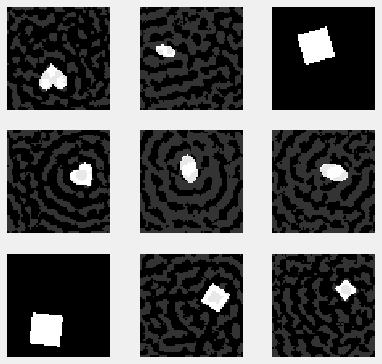

In [31]:
# Verify the resulting images
show_images_grid(X_adv.reshape([-1, 64, 64]), num_images=9)

In [32]:
# Train models (FFNN and CBM Sequential)
# FFNN
path = "../../models/adversarial_ffnn"
_, ffnn_model = end_to_end_binary_classifier(dataset, X_train_new, y_train_new, X_val_new,
                                             y_val_new, save_path=path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the FFNN domain classifier is {acc}.")

# CBM
path = "../../models/adversarial_cbm"
cbm_model = cbm_binary_classifier(dataset, ConceptBottleneckTraining.Joint, X_train_new,
                                  c_train_new, y_train_new, X_val_new, c_val_new, y_val_new,
                                  None, path)
acc, _ = evaluate_binary_classifier(ClassifierTwoSampleTest.CBM, cbm_model, X_test_new,
                                    y_test_new, ORIGINAL_SHAPE)
print(f"The accuracy of the CBM (sequential) domain classifier is {acc}.")

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/adversarial_ffnn/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/adversarial_ffnn/assets


The accuracy of the FFNN domain classifier is 0.9842962962962963.


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/adversarial_cbm/assets


INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/explaining-dataset-shifts/models/adversarial_cbm/assets


The accuracy of the CBM (sequential) domain classifier is 0.9849629629629629.
